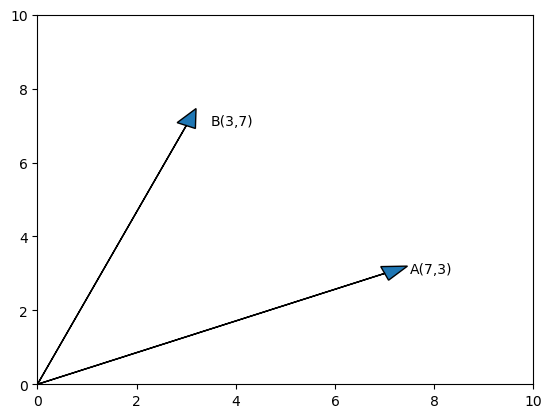

In [11]:
import numpy as np

import matplotlib.pyplot as plt

# consider two vectors A and B in 2-D

A = np.array([7,3])

B = np.array([3,7])

ax = plt.axes()

ax.arrow(0.0, 0.0, A[0], A[1], head_width=0.4, head_length=0.5)

plt.annotate(f"A({A[0]},{A[1]})", xy=(A[0], A[1]),xytext=(A[0]+0.5, A[1]))

ax.arrow(0.0, 0.0, B[0], B[1], head_width=0.4, head_length=0.5)

plt.annotate(f"B({B[0]},{B[1]})", xy=(B[0], B[1]),xytext=(B[0]+0.5, B[1]))

plt.xlim(0,10)

plt.ylim(0,10)

plt.show()

plt.close()

In [12]:
# cosine similarity between A and B

cos_sim = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

print (f"Cosine Similarity between A and B:{cos_sim}")

print (f"Cosine Distance between A and B:{1-cos_sim}")

Cosine Similarity between A and B:0.7241379310344827
Cosine Distance between A and B:0.27586206896551735


In [13]:
tup1 = (4,9,11,23)
tup1[1:4]

(9, 11, 23)

In [14]:
a=13//4
print(a)

3


In [15]:
import math
print(math.sqrt(25))

5.0


In [16]:
i = 1
while i <= 5:
    print(i)
    i += 2
else:
    print(0)

1
3
5
0


In [17]:
A = {1,2,3,4,6}

B = {1,2,5,8,9}

# Intersaction and Union of two sets can also be done using & and | operators.

C = A.intersection(B)

D = A.union(B)

print('AnB = ', C)

print('AUB = ', D)

print('J(A,B) = ', float(len(C))/float(len(D)))

AnB =  {1, 2}
AUB =  {1, 2, 3, 4, 5, 6, 8, 9}
J(A,B) =  0.25


In [18]:
def jaccard_similarity(set1, set2):

    # intersection of two sets

    intersection = len(set1.intersection(set2))

    # Unions of two sets

    union = len(set1.union(set2))

     

    return intersection / union

 

set_a = {"Language", "for", "Geeks", "NLP", "Data Science"}

set_b = {"NLP", "for", "Language", "Data", 'ML', "AI"}

 

similarity = jaccard_similarity(set_a, set_b)

print("Jaccard Similarity:", similarity)

Jaccard Similarity: 0.375


In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Step 1: Define predefined chatbot responses

responses = [

    "You can return an item within 7 days of purchase.",
    "Our return policy allows you to return items that are unopened and in their original condition.",
    "We offer free shipping on orders over $50.",
    "To track your order, you can visit the 'Order Tracking' page and enter your order number.",
    "Our customer support team is available from 9 AM to 6 PM, Monday through Friday."

]

In [3]:
# Step 2: Sample user input (this would come from a user in a real chatbot)

user_input = "How can I track my order?"

In [4]:
# Step 3: Preprocess the text using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')  
all_texts = responses + [user_input]  

In [5]:
# Srep 4: Convert the text to TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(all_texts)

In [6]:
# Step 5: Compute cosine similarity between the user input and all responses

user_vector = tfidf_matrix[-1]  
response_vectors = tfidf_matrix[:-1]  

# Calculate cosine similarities

cosine_similarities = cosine_similarity(user_vector, response_vectors)

In [7]:
# Step 6: Find the most similar response

most_similar_idx = np.argmax(cosine_similarities)  

In [9]:
# Step 7: Display the most relevant response

print(f"User Query: {user_input}")
print(f"Most relevant response: {responses[most_similar_idx]}")

User Query: How can I track my order?
Most relevant response: To track your order, you can visit the 'Order Tracking' page and enter your order number.


In [2]:
import io
import random
import string 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer # convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.stem import WordNetLemmatizer

In [3]:
#!pip install nltk
import nltk

In [ ]:
nltk.download('popular', quiet=True) 
nltk.download('punkt') 
nltk.download('wordnet')

In [12]:
f=open('input.txt','r',errors = 'ignore')
raw = f.read()
raw = raw.lower()

In [13]:
import nltk
sent_tokens = nltk.sent_tokenize(raw)
word_tokens = nltk.word_tokenize(raw)

In [14]:
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [15]:
GREETING_INPUTS = ("hello", "hi", "greetings", "what's up","hey",\

                   "how are you?")
GREETING_RESPONSES = ["hi", "hey", "hi there", "hello", \

                      "I am glad! You are talking to me", \

                      "I am fine! How about you?"]
def greeting(sentence): 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [16]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you."
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [23]:
flag=True
print("SABot: My name is SABot. How can I assist you?. \
If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("SABot: You are welcome...")
        else:
            if(greeting(user_response)!=None):
                print("SABot: "+greeting(user_response))
            else:
                print("SABot: ",end=" ")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("SABot: Bye! take care...")

SABot: My name is SABot. How can I assist you?. If you want to exit, type Bye!
hi
SABot: I am glad! You are talking to me
thank you
SABot: You are welcome...
